## K-Nearest Neighbors (KNN) Regressor

### 1. Load & Inspect the Dataset

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", "white", "ticks"

In [2]:
# Load the dataset
df = pd.read_csv('admission_predict.csv')  # Make sure 'admission_predict.csv' is in your working directory

In [3]:
# Basic structure of the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


In [4]:
print("First 5 Rows:")
df.head()

First 5 Rows:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### 2. Basic Preprocessing

In [6]:
# Check for null values
print("Missing Values:")
df.isnull().sum()

Missing Values:


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.duplicated().sum()

0

### 3. EDA

Histogram for Each Feature

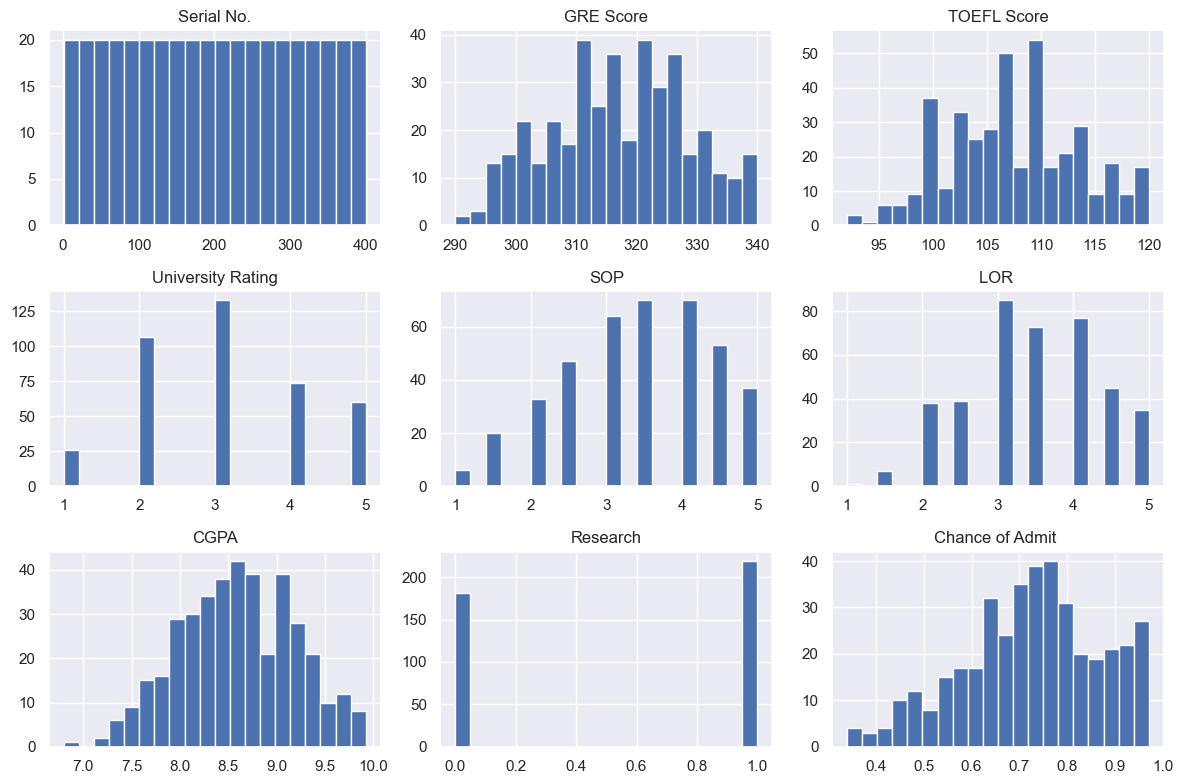

In [8]:
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


<Axes: xlabel='Chance of Admit ', ylabel='Count'>

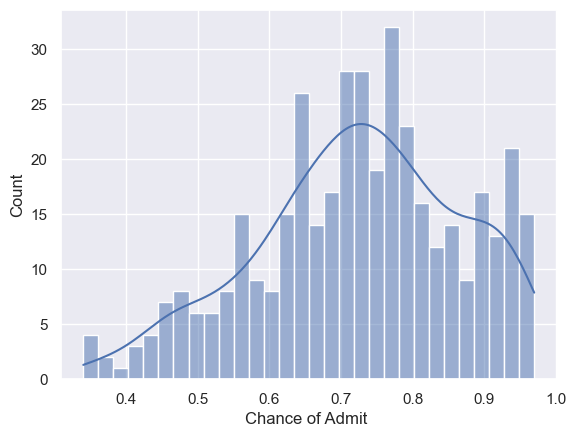

In [9]:
sns.histplot(data=df, x='Chance of Admit ', kde=True, bins=30)  # Adjust bins as needed

Pairplot (Relationships)

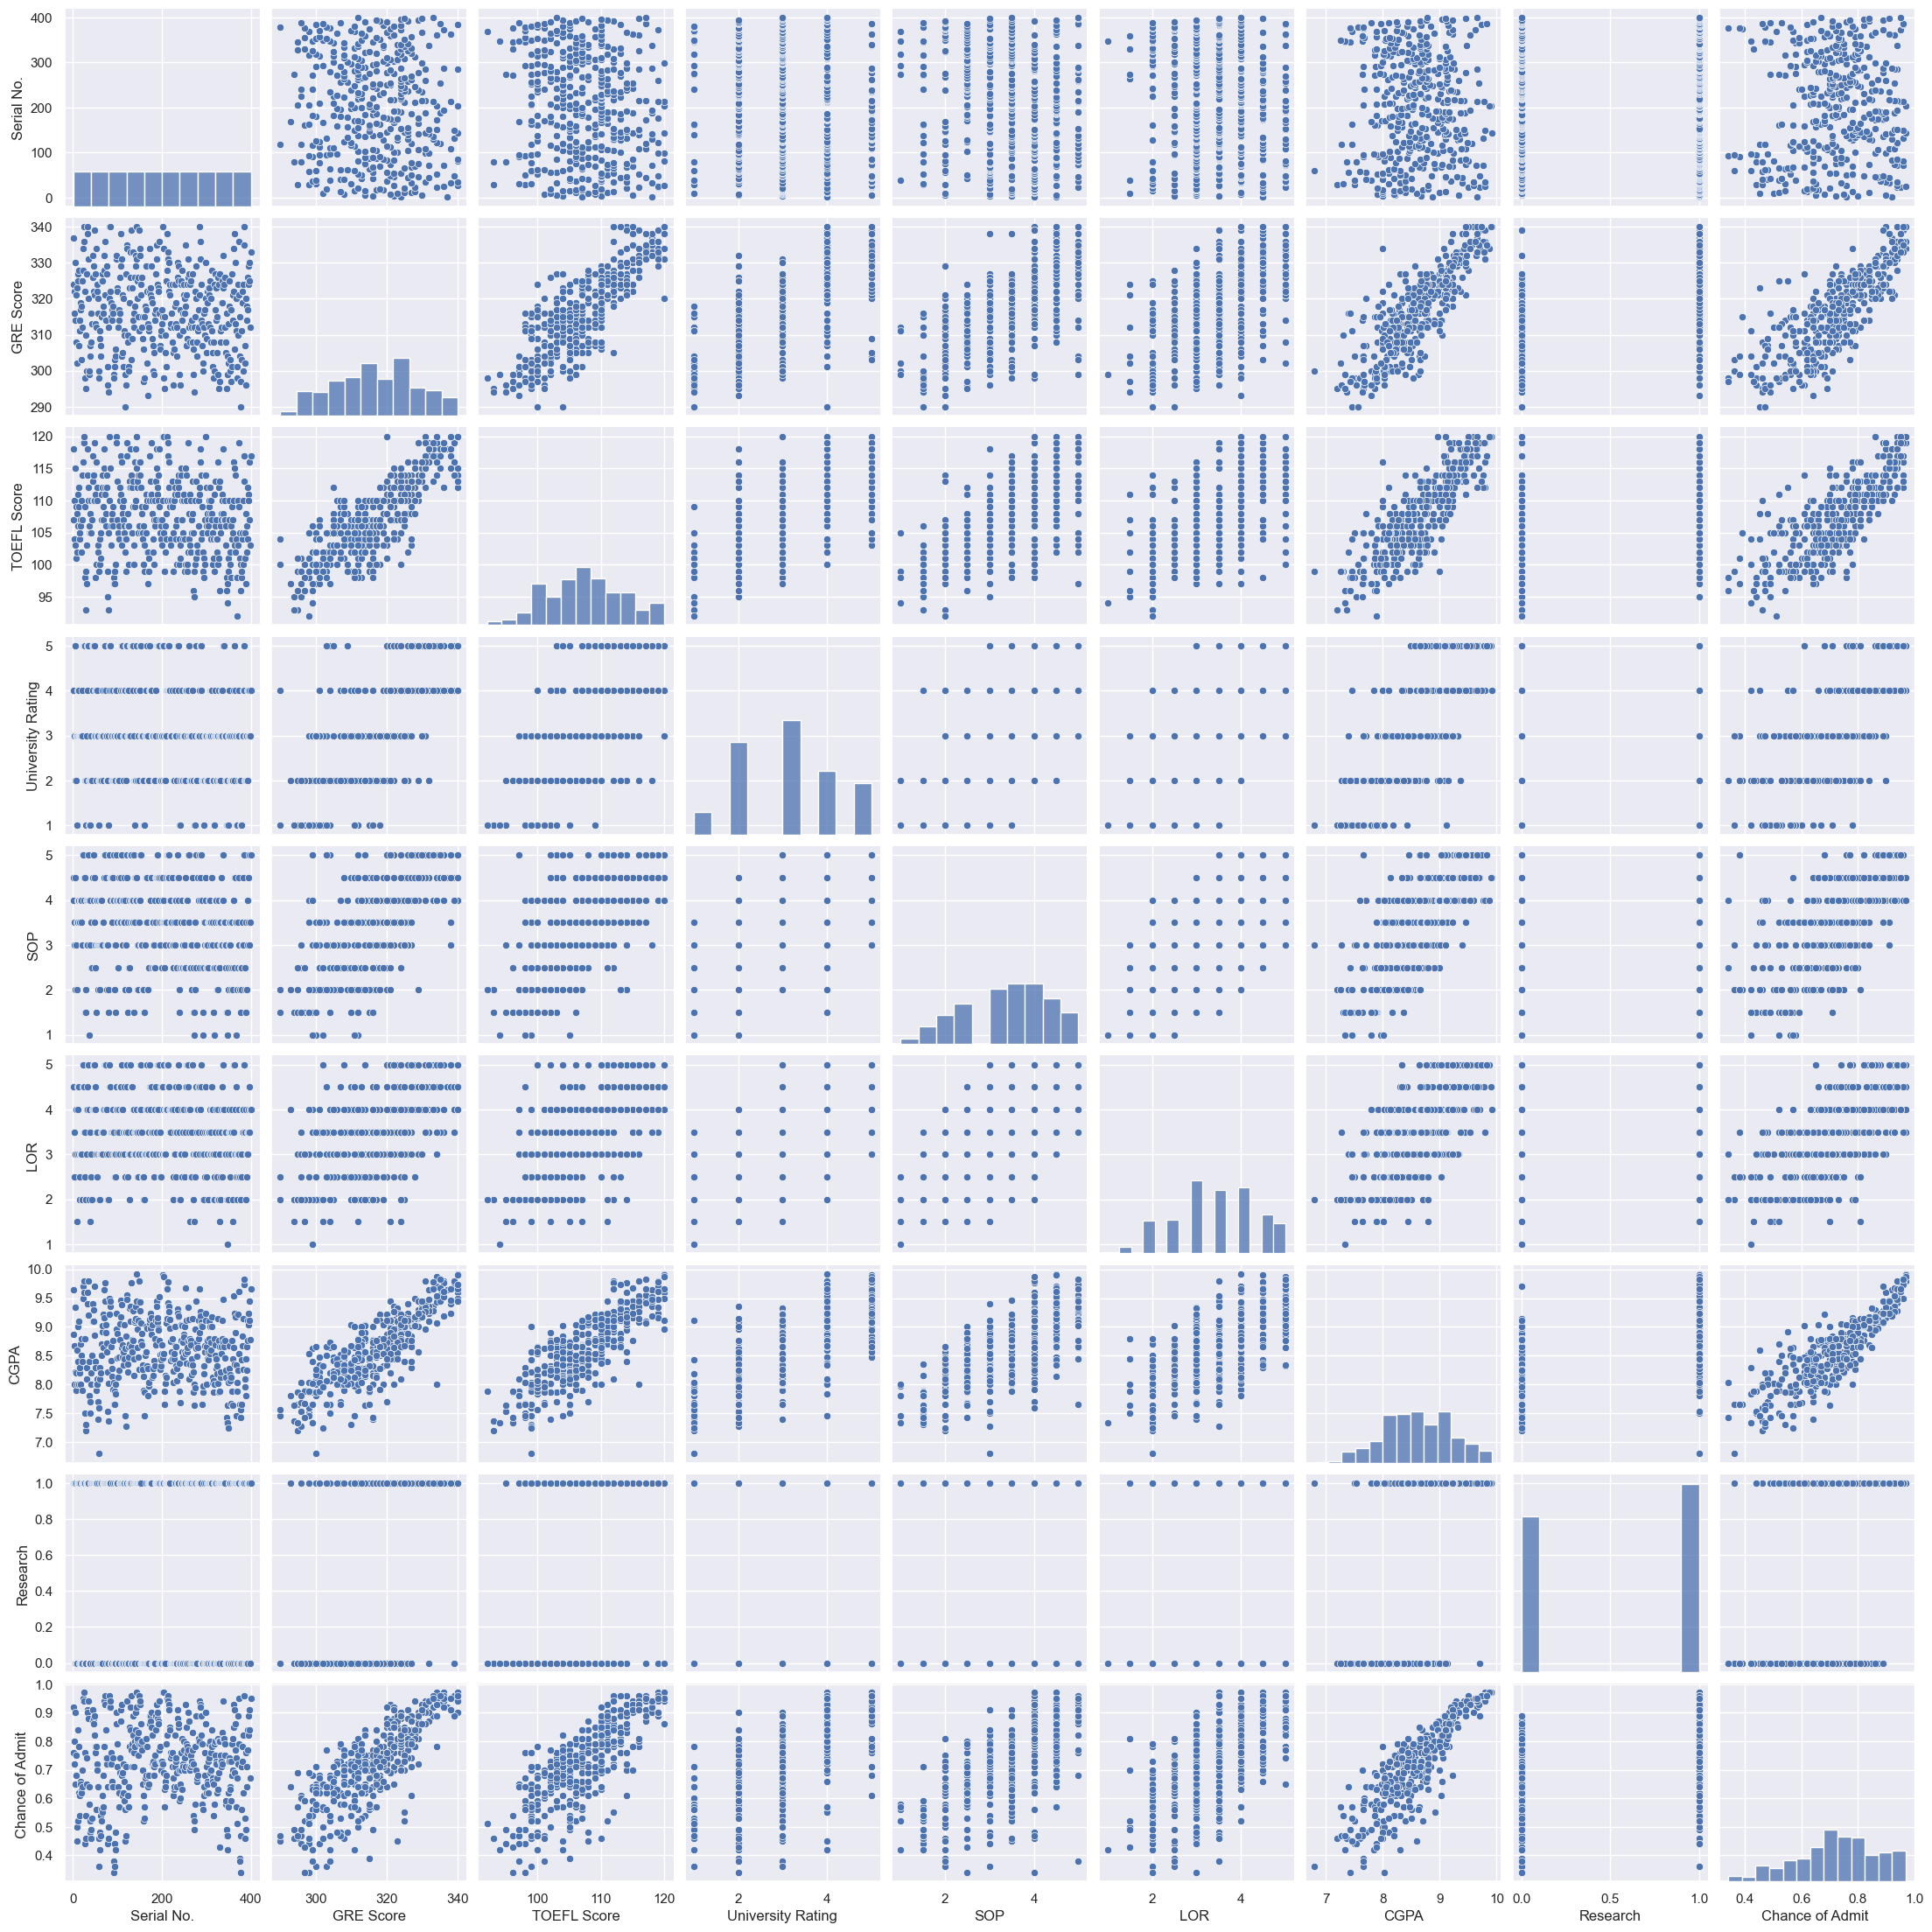

In [10]:
sns.pairplot(df)
plt.show()

Correlation Heatmap

Shows how strongly features are related to each other and to the target:

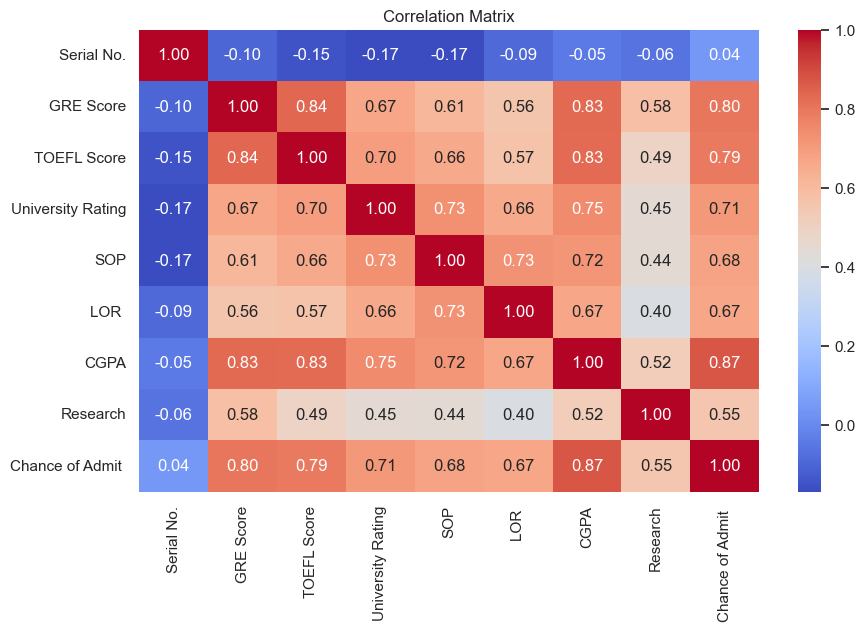

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

### 4. Train Test Split

Split the data into training (80%) and testing (20%):

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Scale the features


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Train the model

In [16]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate and train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)


### 7. Train the Model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.05009999999999999
Root Mean Squared Error (RMSE): 0.0709732343915648
R² Score: 0.8049363010113785


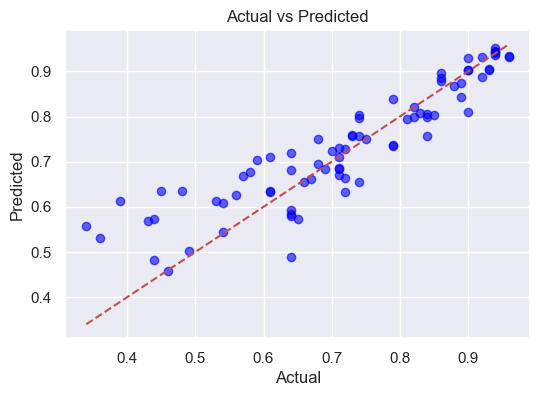

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


### 8. Hyperparameter Tuning 

In [19]:
error_rates = []

for k in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    
    # Use RMSE as error metric
    rmse = np.sqrt(mean_squared_error(y_test, pred_k))
    error_rates.append(rmse)

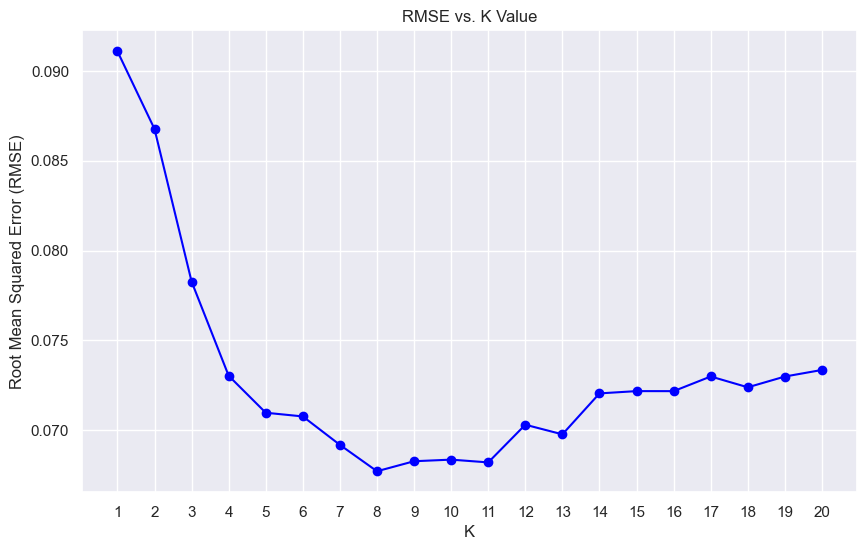

In [20]:
# Plot RMSE vs. K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', color='blue')
plt.title("RMSE vs. K Value")
plt.xlabel("K")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define model
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(3, 15, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Negative MSE):", grid_search.best_score_)

# Predict on test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R² Score:", r2)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Score (Negative MSE): -0.0038200516929623473
Test MSE: 0.004539820871493601
Test R² Score: 0.8241971230168963


### KNN Hyperparameters

| Hyperparameter | Description                                          | Tip                                          | Example Values                              |
| -------------- | ---------------------------------------------------- | -------------------------------------------- | ------------------------------------------- |
| `n_neighbors`  | Number of neighbors to consider                      | Use odd values to avoid ties                 | 3, 5, 7, 9                                  |
| `weights`      | Voting strategy: all equal or weighted               | Try `'distance'` if close points matter more | `'uniform'`, `'distance'`                   |
| `metric`       | Distance function                                    | `'minkowski'` (default)                      | `'minkowski'`, `'euclidean'`, `'manhattan'` |
| `p`            | Power for Minkowski (p=2: Euclidean, p=1: Manhattan) | Try both                                     | 1, 2                                        |
